# Лабораторная работа 1

Выберем вариант 6

$f(x) = cos(x + 2.3^x)$, $x \in [-1,2]$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
f = lambda x : np.cos(x + 2.3**x)

## Задание 1

Построим график функции и определим участок унимодальности

Text(0.5, 1.0, '$f(x) = cos(x + 2.3^x)$, $x \\in [-1,2]$')

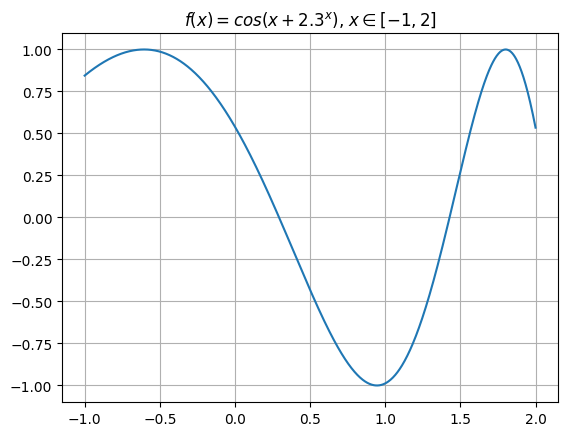

In [3]:
x = np.linspace(-1,2,10**3)
y = f(x)
plt.plot(x,y)
plt.grid()
plt.title("$f(x) = cos(x + 2.3^x)$, $x \in [-1,2]$")

Выберем участок унимодальности: $[a_0,b_0] = [-0.5,1.5]$

Text(0.5, 1.0, '$f(x) = cos(x + 2.3^x)$, $x \\in [-0.5,1.5]$')

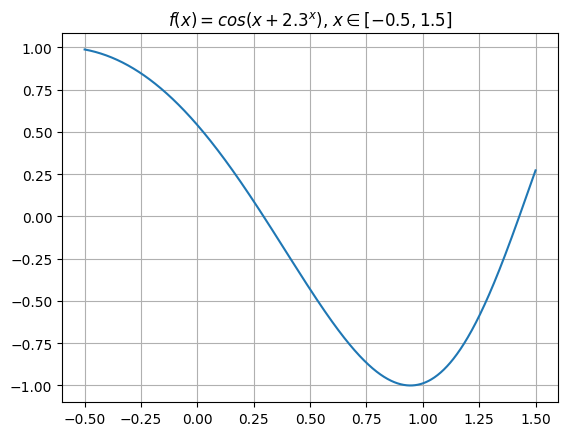

In [4]:
x = np.linspace(-0.5,1.5,10**3)
y = f(x)
plt.plot(x,y)
plt.grid()
plt.title("$f(x) = cos(x + 2.3^x)$, $x \in [-0.5,1.5]$")

## Задание 2

In [5]:
def dichotomy(func,init_borders,epsilon):
    x_l, x_r = init_borders
    f_l, f_r = func(x_l), func(x_r)
    epsilon_1 = [abs(x_l - x_r)]
    epsilon_2 = [abs(f_l - f_r)]
    while epsilon_1[-1]  >= epsilon or epsilon_2[-1] >= epsilon:
        x_new_l = (x_l + x_r) / 2 - epsilon / 4
        x_new_r = (x_l + x_r) / 2 + epsilon / 4
        f_new_l = func(x_new_l)
        f_new_r = func(x_new_r)
        if f_new_r > f_new_l:
            x_r = x_new_r
            f_r = f_new_r
        else:
            x_l = x_new_l
            f_l = f_new_l
        epsilon_1.append(abs(x_l - x_r))
        epsilon_2.append(abs(f_l - f_r))
    return (x_l + x_r) / 2, epsilon_1, epsilon_2

In [6]:
borders = [-0.5, 1.5]
x_star, eps_1, eps_2 = dichotomy(f,borders, 10**-3 * 2)

Приближение точки минимума:

In [7]:
x_star

0.944601806640625

Число итераций:

In [8]:
len(eps_1)

12

## Задание 3

In [9]:
def diff(func, x_, h):
    return (func(x_ + h) - func(x_ - h)) / (2*h)
    
def diff2(func, x_, h):
    return (func(x_ + h) - 2*func(x_) + func(x_ - h)) / (2*h**2)

def newton(func,init_x,epsilon):
    last_x = init_x
    x =  last_x - diff(func,last_x,0.01) / diff2(func,last_x,0.01)
    epsilon_3 = [abs(x - last_x)]
    epsilon_4 = [abs(diff(func,x,0.01))]
    
    while epsilon_3[-1] >= epsilon or epsilon_4[-1] >= epsilon:
        last_x = x
        x =  last_x -  0.5 * diff(func,last_x,0.01) / diff2(func,last_x,0.01)
        epsilon_3.append(abs(x - last_x))
        epsilon_4.append(abs(diff(func,x,0.01)))
    return x, epsilon_3, epsilon_4
        

Text(0.5, 1.0, "$\\frac{f'(x)}{f''(x)}$, $x \\in [-0.5,1.5]$")

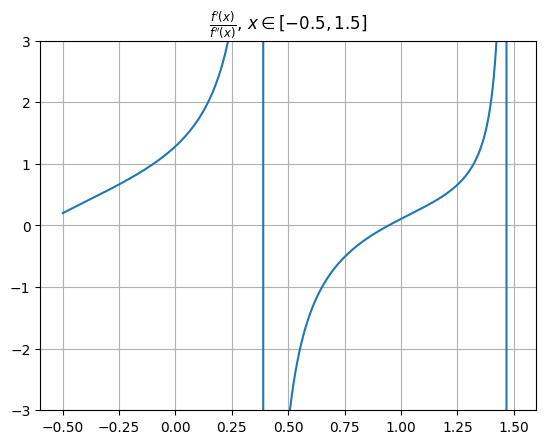

In [10]:
x = np.linspace(-0.5,1.5,10**3)
y_1 = diff(f,x,0.01)
y_2 = diff2(f,x,0.01)
plt.plot(x,y_1/y_2)
plt.grid()
plt.ylim([-3,3])
plt.title("$\\frac{f'(x)}{f''(x)}$, $x \in [-0.5,1.5]$")

In [11]:
x_star, eps_3, eps_4 = newton(f,0.8, 10**-3 * 2)

In [12]:
x_star

0.9448242147469292

In [13]:
len(eps_4)

4

## Задание 4

| Метод      | Условие остановки | Число итераций | Оценка минимума    |
| :---        |    :----:   |    :----:   |          ---: |
| Дихотомия      | $\|x_r - x_{l}\| < \varepsilon$ & $\|f(x_r) - f(x_{l})\| < \varepsilon$       | 12       | 0.9446  |
| Ньютона   | $\|x_k - x_{k+1}\| < \varepsilon$ & $\|f'(x_k)\| < \varepsilon$        | 4       | 0.9448      |

## Задание 5

Text(0.5, 1.0, '$\\varepsilon_4(n)$')

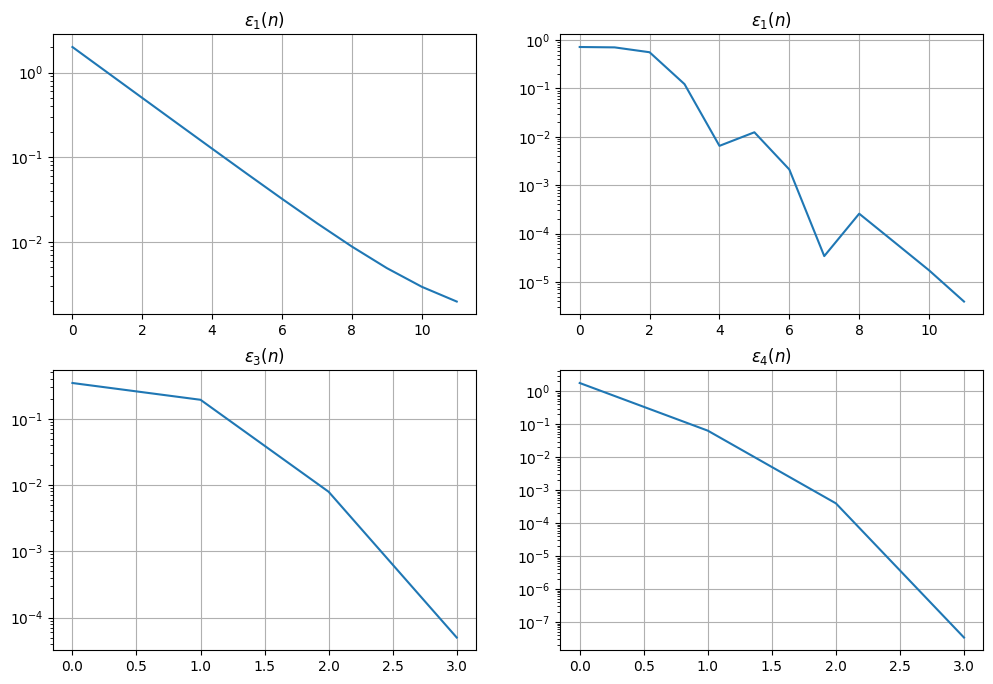

In [14]:
fig, ax = plt.subplots(2,2,figsize=(12,8))
ax[0,0].semilogy(eps_1)
ax[0,0].grid()
ax[0,0].set_title("$\\varepsilon_1(n)$")
ax[0,1].semilogy(eps_2)
ax[0,1].grid()
ax[0,1].set_title("$\\varepsilon_1(n)$")
ax[1,0].semilogy(eps_3)
ax[1,0].grid()
ax[1,0].set_title("$\\varepsilon_3(n)$")
ax[1,1].semilogy(eps_4)
ax[1,1].grid()
ax[1,1].set_title("$\\varepsilon_4(n)$")

Можем сделать вывод о скорости сходимости методов: 
1. Метод дихотомии обладает линейной сходимостью 
2. Метод Ньютона облодает квадратичной сходимостью